- 과정
    * 데이터파일 확인 
        - 첫번째 줄이 컬럼명 맞는지 확인
        - 불필요한 컬럼이나 행이 있는지 확인
        - 결측치 정도 확인 
    * 데이터 전처리 : 데이터 정리 및 손질
        - 파일 확인 후 체크한 사항 진행
        - 결측치 처리
        - 이상치 처리
        - 중복데이터 처리
        - 형변환 => 실제 데이터와 타입 일치
    * 데이터 가공 : 분석하고자 하는 데이터 형태로 변환
        - 행인덱스 처리 : 멀티인덱스/컬럼=>행인덱스/행인덱스 초기화
        - 필요한 컬럼 & 행 추출
        - 추가적인 결측치/이상치/중복데이터 처리
        - 형변환 => 연속->범주형 / 범주->연속형
    * 데이터 분석
        - 탐색적 분석 : 주어진 데이터를 기반으로 의미를 찾아내는 것
        - 시각화 및 분석 결과 텍스트 요약 정리

In [180]:
import pandas as pd
import matplotlib.pyplot as plt

- [1] 데이터 준비

In [181]:
df=pd.read_csv('Most Streamed Spotify Songs 2024.csv',encoding='cp1252',thousands=',')

- [2] 데이터 확인 : 행과 컬럼수, 실제 데이터와 컬럼 타입, 결측치 체크

In [182]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Track                       4600 non-null   object 
 1   Album Name                  4600 non-null   object 
 2   Artist                      4595 non-null   object 
 3   Release Date                4600 non-null   object 
 4   ISRC                        4600 non-null   object 
 5   All Time Rank               4600 non-null   int64  
 6   Track Score                 4600 non-null   float64
 7   Spotify Streams             4487 non-null   float64
 8   Spotify Playlist Count      4530 non-null   float64
 9   Spotify Playlist Reach      4528 non-null   float64
 10  Spotify Popularity          3796 non-null   float64
 11  YouTube Views               4292 non-null   float64
 12  YouTube Likes               4285 non-null   float64
 13  TikTok Posts                3427 

- [3] 데이터 전처리

In [183]:
# 노래 정보 관련 열과 틱톡 관련 열 추출
musicDF=df[['Track','Release Date','Artist','TikTok Likes','TikTok Views']].copy()

In [184]:
# Track 열을 인덱스로 설정
tiktokDF = musicDF.set_index('Track').copy()

In [185]:
tiktokDF['Release Year'] = tiktokDF['Release Date'].str[-4:]

In [186]:
tiktokDF['Release Year'] = tiktokDF['Release Year'].astype('int')
tiktokDF.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4600 entries, MILLION DOLLAR BABY to Me Acostumbre (feat. Bad Bunny)
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Release Date  4600 non-null   object 
 1   Artist        4595 non-null   object 
 2   TikTok Likes  3620 non-null   float64
 3   TikTok Views  3619 non-null   float64
 4   Release Year  4600 non-null   int32  
dtypes: float64(2), int32(1), object(2)
memory usage: 197.7+ KB


In [187]:
tiktokDF.head(20)

,Release Date,Artist,TikTok Likes,TikTok Views,Release Year
Track,,,,,
MILLION DOLLAR BABY,4/26/2024,Tommy Richman,6.515659e+08,5.332282e+09,2024
Not Like Us,5/4/2024,Kendrick Lamar,3.522355e+07,2.083390e+08,2024
i like the way you kiss me,3/19/2024,Artemas,2.751542e+08,3.369121e+09,2024
Flowers,1/12/2023,Miley Cyrus,1.078758e+09,1.460373e+10,2023
Houdini,5/31/2024,Eminem,NaN,NaN,2024
Lovin On Me,11/10/2023,Jack Harlow,2.149435e+08,2.938687e+09,2023
Beautiful Things,1/18/2024,Benson Boone,2.958494e+07,5.349153e+08,2024
Gata Only,2/2/2024,FloyyMenor,3.385467e+08,3.804584e+09,2024
Danza Kuduro - Cover,6/9/2024,MUSIC LAB JPN,NaN,NaN,2024


In [188]:
DF24 = tiktokDF[tiktokDF['Release Year']==2024]

In [189]:
DF24_like = DF24.sort_values(by=['TikTok Likes'],ascending=False).head(20)
DF24_view = DF24.sort_values(by=['TikTok Views'],ascending=False).head(20)

In [190]:
DF24_like

,Release Date,Artist,TikTok Likes,TikTok Views,Release Year
Track,,,,,
MILLION DOLLAR BABY,4/26/2024,Tommy Richman,651565900.0,5.332282e+09,2024
TEXAS HOLD 'EM,2/10/2024,Beyoncï¿,485200392.0,6.518604e+09,2024
Gata Only,2/2/2024,FloyyMenor,338546668.0,3.804584e+09,2024
i like the way you kiss me,3/19/2024,Artemas,275154237.0,3.369121e+09,2024
Future,1/10/2024,official sound studio,273236305.0,4.306270e+09,2024
Smart,2/19/2024,LE SSERAFIM,234770546.0,2.059824e+09,2024
Lady Killers II (Christoph Andersson Remix),3/17/2024,G-Eazy,182937084.0,1.542242e+09,2024
Nasty,4/12/2024,Tinashe,171691158.0,1.051026e+09,2024
Espresso,4/12/2024,Sabrina Carpenter,169144295.0,1.379499e+09,2024


In [191]:
DF24_view

,Release Date,Artist,TikTok Likes,TikTok Views,Release Year
Track,,,,,
TEXAS HOLD 'EM,2/10/2024,Beyoncï¿,485200392.0,6.518604e+09,2024
MILLION DOLLAR BABY,4/26/2024,Tommy Richman,651565900.0,5.332282e+09,2024
Future,1/10/2024,official sound studio,273236305.0,4.306270e+09,2024
Gata Only,2/2/2024,FloyyMenor,338546668.0,3.804584e+09,2024
i like the way you kiss me,3/19/2024,Artemas,275154237.0,3.369121e+09,2024
Smart,2/19/2024,LE SSERAFIM,234770546.0,2.059824e+09,2024
Lady Killers II (Christoph Andersson Remix),3/17/2024,G-Eazy,182937084.0,1.542242e+09,2024
Espresso,4/12/2024,Sabrina Carpenter,169144295.0,1.379499e+09,2024
Karma,4/5/2024,JoJo Siwa,134373320.0,1.314113e+09,2024


C:\Users\kdp\AppData\Local\Temp\ipykernel_7104\2062341412.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.bar(num1,DF24_like['TikTok Likes']/DF24_like['TikTok Likes'][0],color = 'lightpink',width=0.4)
C:\Users\kdp\AppData\Local\Temp\ipykernel_7104\2062341412.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.bar(num2,DF24_view['TikTok Views']/DF24_view['TikTok Views'][0],color = 'blue',width=0.4)


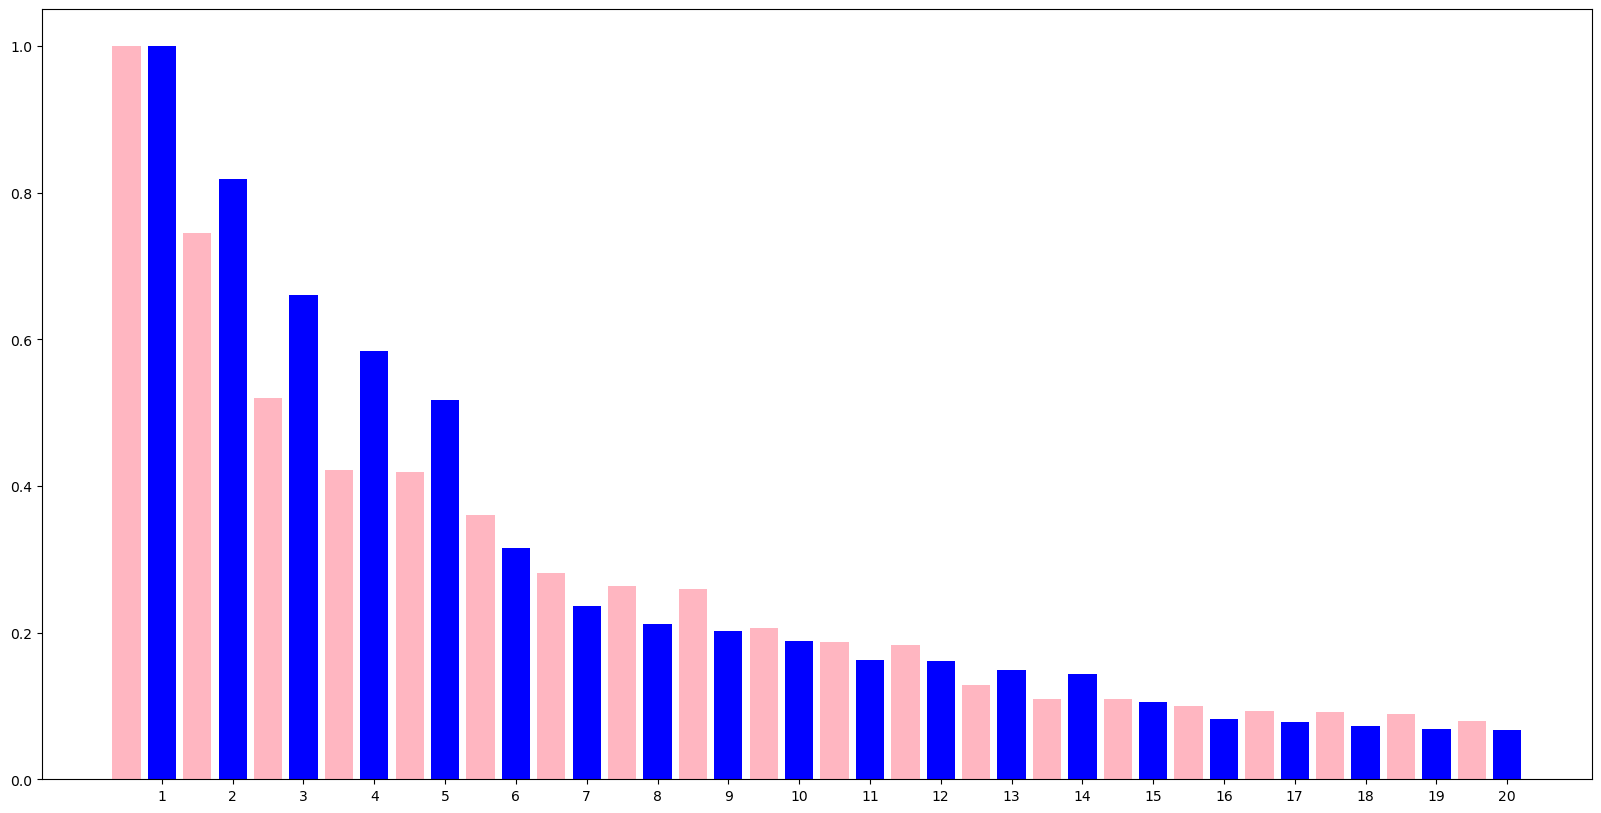

In [192]:
plt.figure(figsize=(20,10))
num1 = pd.Series(range(1,41,2))/2
num2 = pd.Series(range(1,21))
plt.bar(num1,DF24_like['TikTok Likes']/DF24_like['TikTok Likes'][0],color = 'lightpink',width=0.4)
plt.bar(num2,DF24_view['TikTok Views']/DF24_view['TikTok Views'][0],color = 'blue',width=0.4)
plt.xticks(num2)
plt.show()

In [193]:
DF24.corr(numeric_only=True)

,TikTok Likes,TikTok Views,Release Year
TikTok Likes,1.000000,0.964378,NaN
TikTok Views,0.964378,1.000000,NaN
Release Year,NaN,NaN,NaN


In [194]:
corrSR = DF24.corr(numeric_only=True)['TikTok Views']
corrSR

TikTok Likes    0.964378
TikTok Views    1.000000
Release Year         NaN
Name: TikTok Views, dtype: float64

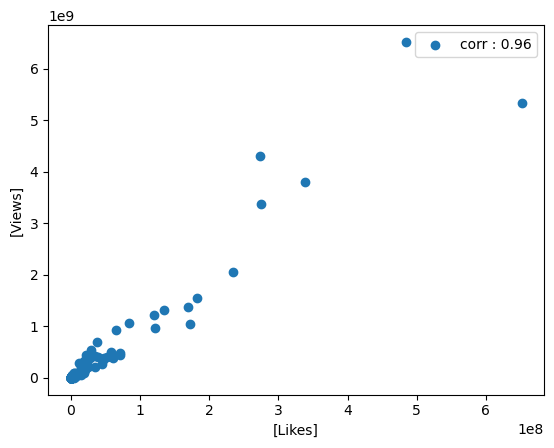

In [195]:
plt.scatter(DF24['TikTok Likes'],DF24['TikTok Views'],label = f"corr : {round(corrSR['TikTok Likes'],2)}")
plt.xlabel('[Likes]')
plt.ylabel('[Views]')
plt.legend()
plt.show()

In [196]:
DF24.describe()

,TikTok Likes,TikTok Views,Release Year
count,1.880000e+02,1.880000e+02,693.0
mean,2.470603e+07,2.525051e+08,2024.0
std,7.540059e+07,8.114589e+08,0.0
min,1.840000e+02,3.319000e+03,2024.0
25%,2.429500e+05,2.254531e+06,2024.0
50%,1.537722e+06,1.265000e+07,2024.0
75%,1.011160e+07,8.838451e+07,2024.0
max,6.515659e+08,6.518604e+09,2024.0


In [197]:
DF24

,Release Date,Artist,TikTok Likes,TikTok Views,Release Year
Track,,,,,
MILLION DOLLAR BABY,4/26/2024,Tommy Richman,651565900.0,5.332282e+09,2024
Not Like Us,5/4/2024,Kendrick Lamar,35223547.0,2.083390e+08,2024
i like the way you kiss me,3/19/2024,Artemas,275154237.0,3.369121e+09,2024
Houdini,5/31/2024,Eminem,NaN,NaN,2024
Beautiful Things,1/18/2024,Benson Boone,29584940.0,5.349153e+08,2024
...,...,...,...,...,...
ATM,5/16/2024,Nemzzz,NaN,NaN,2024
AirBnb,5/17/2024,ian,NaN,NaN,2024
"Tu Juliet Jatt Di ( From ""Jatt & Juliet 3"")",5/24/2024,Diljit Dosanjh,NaN,NaN,2024


In [201]:
DF24.dropna(inplace=True)

C:\Users\kdp\AppData\Local\Temp\ipykernel_7104\3220724922.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF24.dropna(inplace=True)


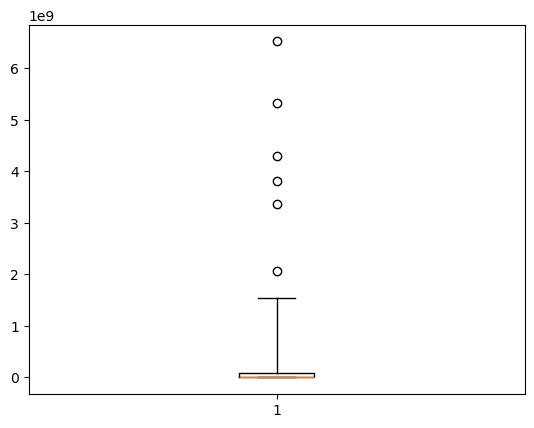

In [202]:
retDict = plt.boxplot(DF24['TikTok Views'],whis=20)
plt.show()